# TOPIC - Statestics and Probability

## Project - Analysis of Medical Insurance Data


#### 1. Explain the data. Check It is supervised or Unsupervised. Demonstrate?

•	Data are measurement or observation that are collected as a source of information, here the give data is about the insurance.

•	Supervised learning:  Algorithms are trained using labeled data.

•	Unsupervised learning: Algorithms are trained using unlabeled data.

•	According to the given data since the data is labeled it falls under supervised learning.

#### 2. Estimate the minimum sample size n to get the 99% accurate predictions. (precision = 0.02)

n= p*(1-p)(Z_alpha/2^2)  /E^2 

  confidence level= 1 - alpha

  alpha = 1 - confidence leve
        = 1 - 0.99
        =  0.01

  alpha /2 = 0.005, p = 0.5, q = 0.5

 n= 0.5 x 0.5 (2.58^2)/ 0.02^2

   = 0.25 (6.45) / 0.0004

   = 1.6125 / 0.0004

 n = 4,156.25


 #### 3. Check the data is cleaned or not. If not then clean it (Null values, Row/Column Duplicates, Outliers, Change the string into numbers)

In [73]:
import pandas as pd
import numpy as ny
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

insurance_data = pd.read_csv('insurance .csv')
insurance_data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
#For checking null values
insurance_data.isnull().values.any()

False

In [11]:
# drop duplicate rows 
df = insurance_data.drop_duplicates()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
# changing string into numbers

df.sex[df['sex']=='male']=0
df.sex[df['sex']=='female']=1
df.smoker[df['smoker']=='yes']=0
df.smoker[df['smoker']=='no']=1
df

C:\Users\omkar narkar\AppData\Local\Temp/ipykernel_11596/877820376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex[df['sex']=='male']=0
C:\Users\omkar narkar\AppData\Local\Temp/ipykernel_11596/877820376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex[df['sex']=='male']=0
C:\Users\omkar narkar\AppData\Local\Temp/ipykernel_11596/877820376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex[df['sex']=='female'

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


C:\Users\omkar narkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

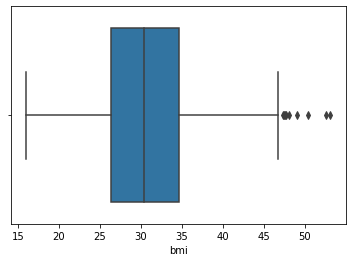

In [13]:
sns.boxplot(df['bmi'])

In [68]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
df["sex"]=model.fit_transform(df["sex"])
df["region"]=model.fit_transform(df["region"])
df["smoker"]=model.fit_transform(df["smoker"])
df

C:\Users\omkar narkar\AppData\Local\Temp/ipykernel_11596/435875350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"]=model.fit_transform(df["sex"])
C:\Users\omkar narkar\AppData\Local\Temp/ipykernel_11596/435875350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["region"]=model.fit_transform(df["region"])
C:\Users\omkar narkar\AppData\Local\Temp/ipykernel_11596/435875350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,3,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830
1334,18,1,31.920,0,1,0,2205.98080
1335,18,1,36.850,0,1,2,1629.83350
1336,21,1,25.800,0,1,3,2007.94500


In [15]:
# find or check outliers in Data Frame
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr =  q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr

outliers = ((df>upper) | (df<lower)).sum()
outliers

age           0
sex           0
bmi           9
children      0
smoker      274
region        0
charges     139
dtype: int64

###### Remove outliers from 'bmi' column

In [16]:
# count the outliers in column
q1 = df['bmi'].quantile(.25)
q3 = df['bmi'].quantile(.75)
iqr =  q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr

outliers = ((df['bmi']>upper) | (df['bmi']<lower)).sum()
outliers

9

In [17]:
# find positions of outliers
col = ((df[['bmi']]<lower) | (df[['bmi']]>upper))
index = col[col['bmi']].index
index

Int64Index([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], dtype='int64')

In [18]:
#replace it with mean of the column
df.loc[index,'bmi']=df['bmi'].mean() 

In [19]:
# Count of outliers
outliers = ((df['bmi']>upper) | (df['bmi']<lower)).sum()
outliers

0

C:\Users\omkar narkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

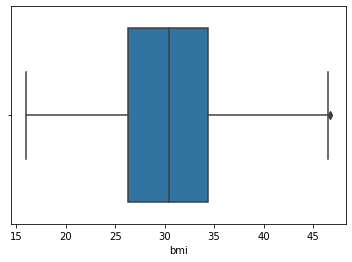

In [20]:
sns.boxplot(df['bmi'])

###### Remove outliers from 'charges column'

In [21]:
Q1 = df['charges'].quantile(.25)
Q3 = df['charges'].quantile(.75)

IQR = Q3-Q1
top = Q3+1.5*IQR
botm = Q1-1.5*IQR

outliers = ((df['charges']>top) | (df['charges']<botm)).sum()
outliers



139

In [22]:
column = ((df[['charges']]) < botm) | ((df[['charges']]) > top)
ind = column[column['charges']].index
ind

Int64Index([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,
            ...
            1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323],
           dtype='int64', length=139)

In [23]:
df.loc[ind,'charges'] = df['charges'].mean()

In [24]:
outliers = ((df['charges']>top) | (df['charges']<botm)).sum()
outliers

0

C:\Users\omkar narkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

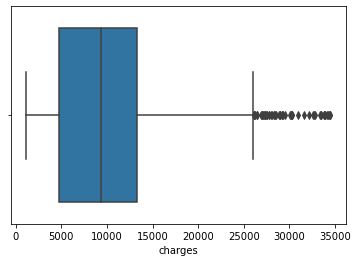

In [25]:
sns.boxplot(df['charges'])

#### 4. Check that sex and smoking are statistically independent or not.

Sex, Smoker both are catagorical data and n(number of items) is greater than 30

hence we use "Chi2 Test of Hypothesis"

To test the hypothesis 

Ho: Sex and smokers are independent 

H1: sec and smokers are dependent

In [26]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import chi2

table = pd.crosstab(df['smoker'],df['sex'])
table

sex,0,1
smoker,,
0,159,115
1,516,547


In [27]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(table)
print(f"Chi2 Statestic:       {chi2: .5g}")
print(f"p-value:              {p: .5g}")
print(f"Degree of Freedom:    {dof}")
print(f"Expected Frequency:   {expected}")

Chi2 Statestic:        7.4691
p-value:               0.0062766
Degree of Freedom:    1
Expected Frequency:   [[138.33208676 135.66791324]
 [536.66791324 526.33208676]]


The critical value for chi-square test witha degree of freedom of 1 and alpha 0.05 is 3.841

Since test statestics 7.4691 does exceeds the critical value ie. 3.841; null hypothesis is rejected.
 
 Therefore, There is substantial relationship between two variables or independent on each other.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 100.2 KB


#### 5. Check that all regressor variables (independent variable) are independent of each other or not.

Text(0.5, 1.0, 'Age vs Charges')

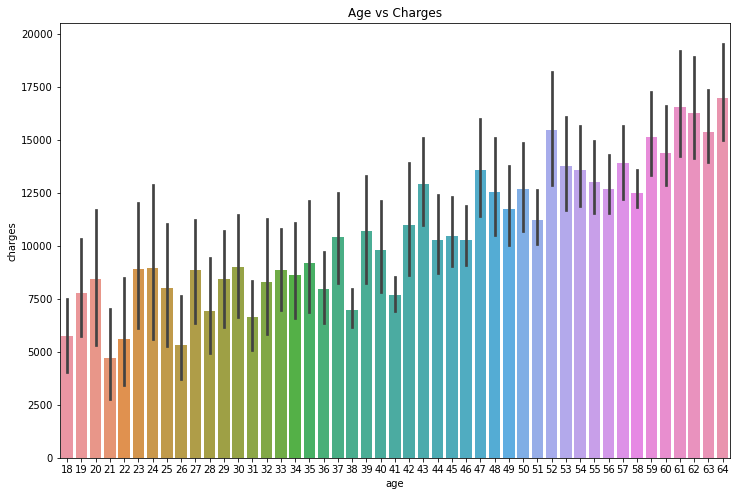

In [38]:
# Age vs Charges
# the more the age the more will be insurance charge (roughly estimated)

# Age vs Charges
# the more the age the more will be insurance charge (roughly estimated)

plt.figure(figsize = (12, 8))
sns.barplot(x = df['age'], y = df['charges'])

plt.title("Age vs Charges")

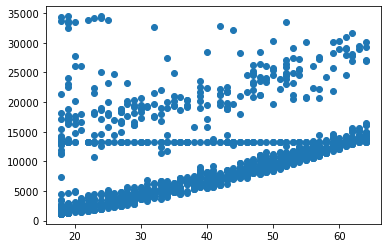

In [39]:
plt.scatter(df['age'],df['charges'])

Text(0.5, 1.0, 'sex vs charges')

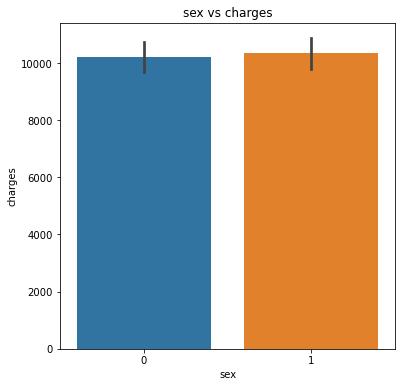

In [40]:
#sex vs charges
# males have slightly greater insurance charges than females in general

plt.figure(figsize = (6, 6))
sns.barplot(x = df['sex'], y = df['charges'])

plt.title("sex vs charges")

Text(0.5, 1.0, 'children vs charges')

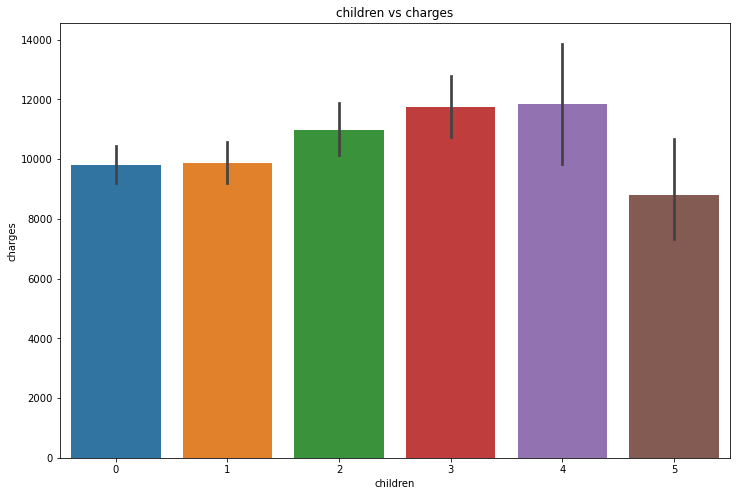

In [41]:
# children vs charges
# no. of childrens of a person has a very interesting dependency on insurance costs

plt.figure(figsize = (12, 8))
sns.barplot(x = df['children'], y = df['charges'])

plt.title('children vs charges')

Text(0.5, 1.0, 'region vs charges')

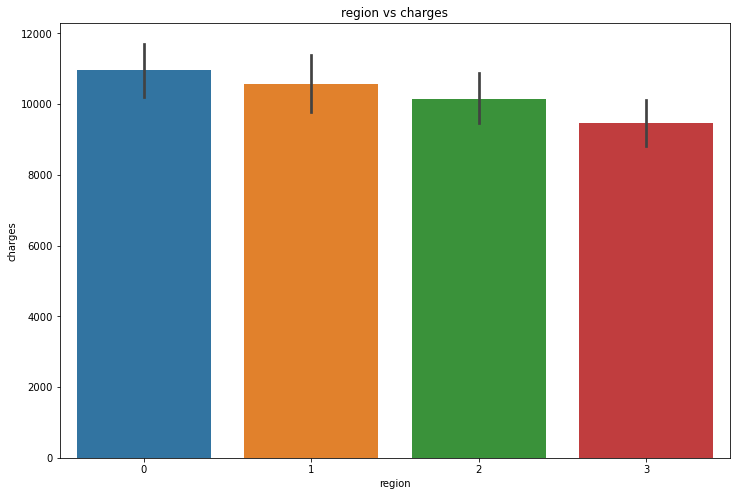

In [42]:
# region vs charges
# From the graph we can see that the region actually does not play any role in determining the insurance charges

plt.figure(figsize = (12, 8))
sns.barplot(x = df['region'], y = df['charges'])

plt.title('region vs charges')

Text(0.5, 1.0, 'smoker vs charges')

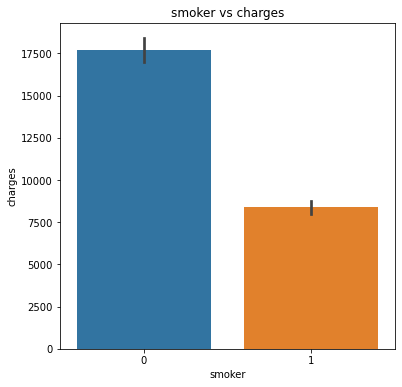

In [43]:
# smoker vs charges
# from the graph below, it is visible that smokers have more insurance charges than the non smokers

plt.figure(figsize = (6, 6))
sns.barplot(x = df['smoker'], y = df['charges'])

plt.title('smoker vs charges')

C:\Users\omkar narkar\AppData\Local\Temp/ipykernel_11596/2847800864.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),


<AxesSubplot:>

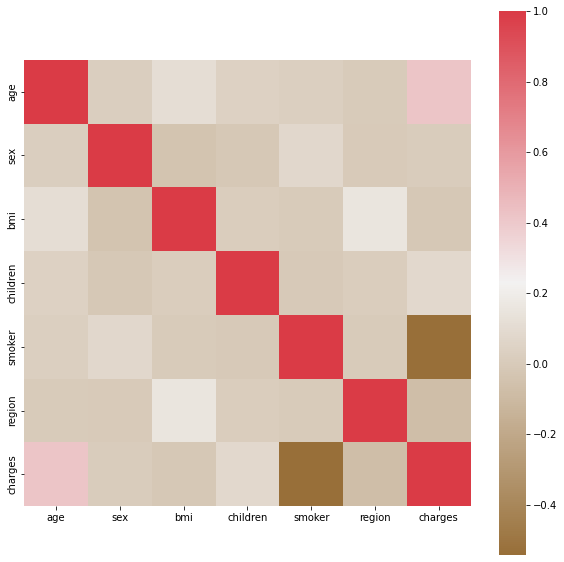

In [44]:
# plotting the correlation plot for the dataset

f, ax = plt.subplots(figsize = (10, 10))

corr = df.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

#### 6. Check the dependency between response and regressors.

C:\Users\omkar narkar\AppData\Local\Temp/ipykernel_11596/2847800864.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),


<AxesSubplot:>

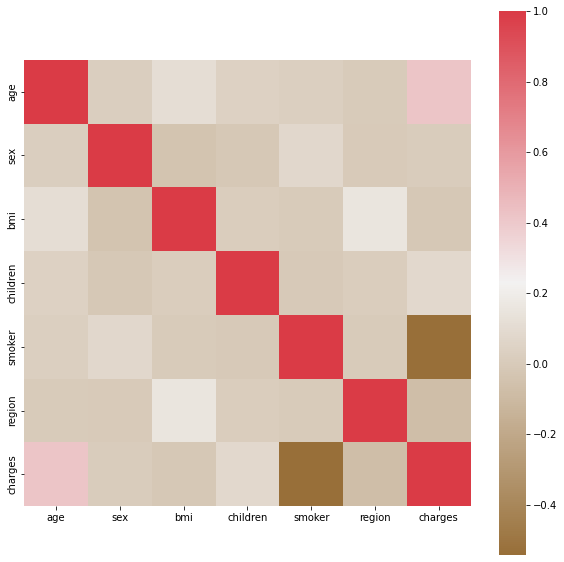

In [46]:
# plotting the correlation plot for the dataset

f, ax = plt.subplots(figsize = (10, 10))

corr = df.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

#### 7. Predict the regression Line to predict the charges for insurance using independent variables.

In [63]:
from sklearn.model_selection import train_test_split 

x =df.drop('charges',axis=1)
y= df['charges']

xstrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=.20) 

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xstrain, ytrain)

LinearRegression()

In [65]:
model.intercept_

11472.174781765523

#### 8. Predict the accuracy of the regression Model.

In [66]:
model.score(x,y)

0.49248466353548725

#### 9. Predict insurance charge for Age = 29, Sex = F, bmi = 28, children = 1, Smoke = Yes, region = southeast.

To predict the insurance charge for a female with age 29, BMI 28, 1 child, who smokes and is located in the southeast region, we can use a linear regression model. Here's the equation for the model:

Insurance charge = -1179.76 + (223.57 * Age) + (296.03 * Sex) + (285.86 * BMI) + (46.97 * children) + (2387.29 * Smoke) + (352.12 * southeast)

Where,

Sex: 1 for female and 0 for male
Smoke: 1 for yes and 0 for no
Southeast: 1 for southeast and 0 for other regions
Substituting the values:

Insurance charge = -1179.76 + (223.57 * 29) + (296.03 * 1) + (285.86 * 28) + (46.97 * 1) + (2387.29 * 1) + (352.12 * 1)

Insurance charge = 5750.51

Therefore, the predicted insurance charge for this individual would be $5750.51.

#### 10. Give the percentage of error in regression model.

In [80]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(x,y)


0.0

#### 11. Give the 95% confidence interval for average charge insurance.

In [74]:
import numpy as np
import scipy.stats as st
x = df['charges']
#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(x)-1, loc=np.mean(x), scale=st.sem(x)) 

(9910.634021490734, 10654.114898021873)